In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")

# Load data
DATA_PATH = "./Final_datasets/telemetry_final_TRAVIATA.parquet"
df = pd.read_parquet(DATA_PATH)

df["timestamp"] = pd.to_datetime(df["timestamp"])
df = df.sort_values("timestamp").reset_index(drop=True)

print("Loaded data shape:", df.shape)
df.head()

Loaded data shape: (404138, 31)


,timestamp,Draught_A_m,Draught_F_m,Latitude_deg,Longitude_deg,SpeedOverGround_kn,HeadingTrue_deg,SpeedThroughWater_kn,ShaftPower_kW,ShaftRev_rpm,...,wind_dir_10m,current_speed_ms,current_dir,HeadingTrue_deg_360,ShaftPower_kW_smooth,ShaftRev_rpm_smooth,SpeedThroughWater_kn_smooth,SpeedOverGround_kn_smooth,wind_speed_10m_ms_smooth,current_speed_ms_smooth
0,2023-01-01 03:18:00+00:00,10.566667,11.305000,8.026458,75.095459,16.746500,-64.083333,17.756666,10050.000000,92.000000,...,181.936737,0.442182,128.261658,295.916667,10094.176389,91.946852,17.756083,16.749324,3.434551,0.436836
1,2023-01-01 03:19:00+00:00,10.570000,11.316667,8.028206,75.091414,16.760000,-63.983333,17.735000,10092.833333,91.950000,...,182.021820,0.440575,128.201294,296.016667,10094.625000,91.949014,17.756532,16.750391,3.433983,0.437002
2,2023-01-01 03:20:00+00:00,10.560000,11.290000,8.030018,75.087233,16.783501,-63.950000,17.723332,10039.250000,91.900000,...,182.109833,0.438939,128.131958,296.050000,10095.242188,91.951493,17.756979,16.751416,3.433401,0.437183
3,2023-01-01 03:21:00+00:00,10.565000,11.320000,8.031967,75.082724,16.800833,-64.000000,17.758334,10026.666667,91.814286,...,182.204453,0.437357,128.067871,296.000000,10096.112374,91.954478,17.757576,16.752447,3.432798,0.437413
4,2023-01-01 03:22:00+00:00,10.565000,11.290000,8.033756,75.078592,16.769800,-64.000000,17.765001,9976.333333,91.816667,...,182.291122,0.436824,128.109863,296.000000,10097.160539,91.957876,17.758333,16.753673,3.432146,0.437683


In [15]:
# Mean draft & trim
df["mean_draft"] = 0.5 * (df["Draught_A_m"] + df["Draught_F_m"])
df["trim"] = df["Draught_A_m"] - df["Draught_F_m"]

# Speed^3
df["stw_cubed"] = df["SpeedThroughWater_kn"] ** 3

# Drydock date handling
drydock_date = pd.Timestamp("2024-04-24", tz="UTC")

if df["timestamp"].dt.tz is None:
    df["timestamp"] = df["timestamp"].dt.tz_localize("UTC")
else:
    df["timestamp"] = df["timestamp"].dt.tz_convert("UTC")

df.head()


,timestamp,Draught_A_m,Draught_F_m,Latitude_deg,Longitude_deg,SpeedOverGround_kn,HeadingTrue_deg,SpeedThroughWater_kn,ShaftPower_kW,ShaftRev_rpm,...,HeadingTrue_deg_360,ShaftPower_kW_smooth,ShaftRev_rpm_smooth,SpeedThroughWater_kn_smooth,SpeedOverGround_kn_smooth,wind_speed_10m_ms_smooth,current_speed_ms_smooth,mean_draft,trim,stw_cubed
0,2023-01-01 03:18:00+00:00,10.566667,11.305000,8.026458,75.095459,16.746500,-64.083333,17.756666,10050.000000,92.000000,...,295.916667,10094.176389,91.946852,17.756083,16.749324,3.434551,0.436836,10.935833,-0.738333,5598.662648
1,2023-01-01 03:19:00+00:00,10.570000,11.316667,8.028206,75.091414,16.760000,-63.983333,17.735000,10092.833333,91.950000,...,296.016667,10094.625000,91.949014,17.756532,16.750391,3.433983,0.437002,10.943333,-0.746667,5578.193740
2,2023-01-01 03:20:00+00:00,10.560000,11.290000,8.030018,75.087233,16.783501,-63.950000,17.723332,10039.250000,91.900000,...,296.050000,10095.242188,91.951493,17.756979,16.751416,3.433401,0.437183,10.925000,-0.730000,5567.190930
3,2023-01-01 03:21:00+00:00,10.565000,11.320000,8.031967,75.082724,16.800833,-64.000000,17.758334,10026.666667,91.814286,...,296.000000,10096.112374,91.954478,17.757576,16.752447,3.432798,0.437413,10.942500,-0.755000,5600.240075
4,2023-01-01 03:22:00+00:00,10.565000,11.290000,8.033756,75.078592,16.769800,-64.000000,17.765001,9976.333333,91.816667,...,296.000000,10097.160539,91.957876,17.758333,16.753673,3.432146,0.437683,10.927500,-0.725000,5606.549986


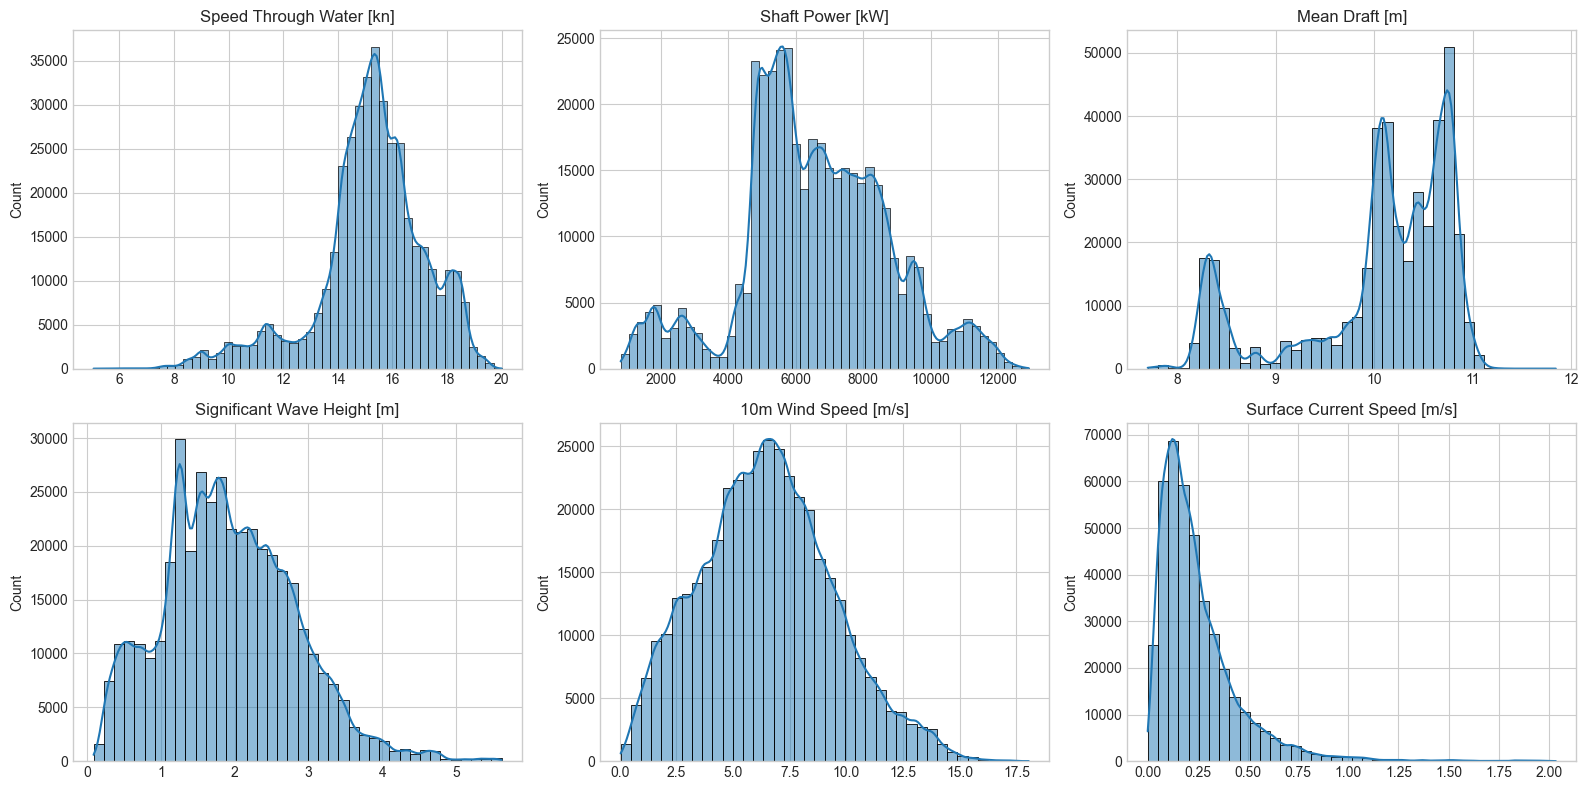

In [16]:
fig, axes = plt.subplots(2, 3, figsize=(16, 8))

sns.histplot(df["SpeedThroughWater_kn"], ax=axes[0, 0], bins=50, kde=True)
axes[0, 0].set_title("Speed Through Water [kn]")

sns.histplot(df["ShaftPower_kW"], ax=axes[0, 1], bins=50, kde=True)
axes[0, 1].set_title("Shaft Power [kW]")

sns.histplot(df["mean_draft"], ax=axes[0, 2], bins=40, kde=True)
axes[0, 2].set_title("Mean Draft [m]")

sns.histplot(df["swh"], ax=axes[1, 0], bins=40, kde=True)
axes[1, 0].set_title("Significant Wave Height [m]")

sns.histplot(df["wind_speed_10m_ms"], ax=axes[1, 1], bins=40, kde=True)
axes[1, 1].set_title("10m Wind Speed [m/s]")

sns.histplot(df["current_speed_ms"], ax=axes[1, 2], bins=40, kde=True)
axes[1, 2].set_title("Surface Current Speed [m/s]")

for ax in axes.ravel():
    ax.set_xlabel("")
    ax.set_ylabel("Count")

plt.tight_layout()
plt.show()


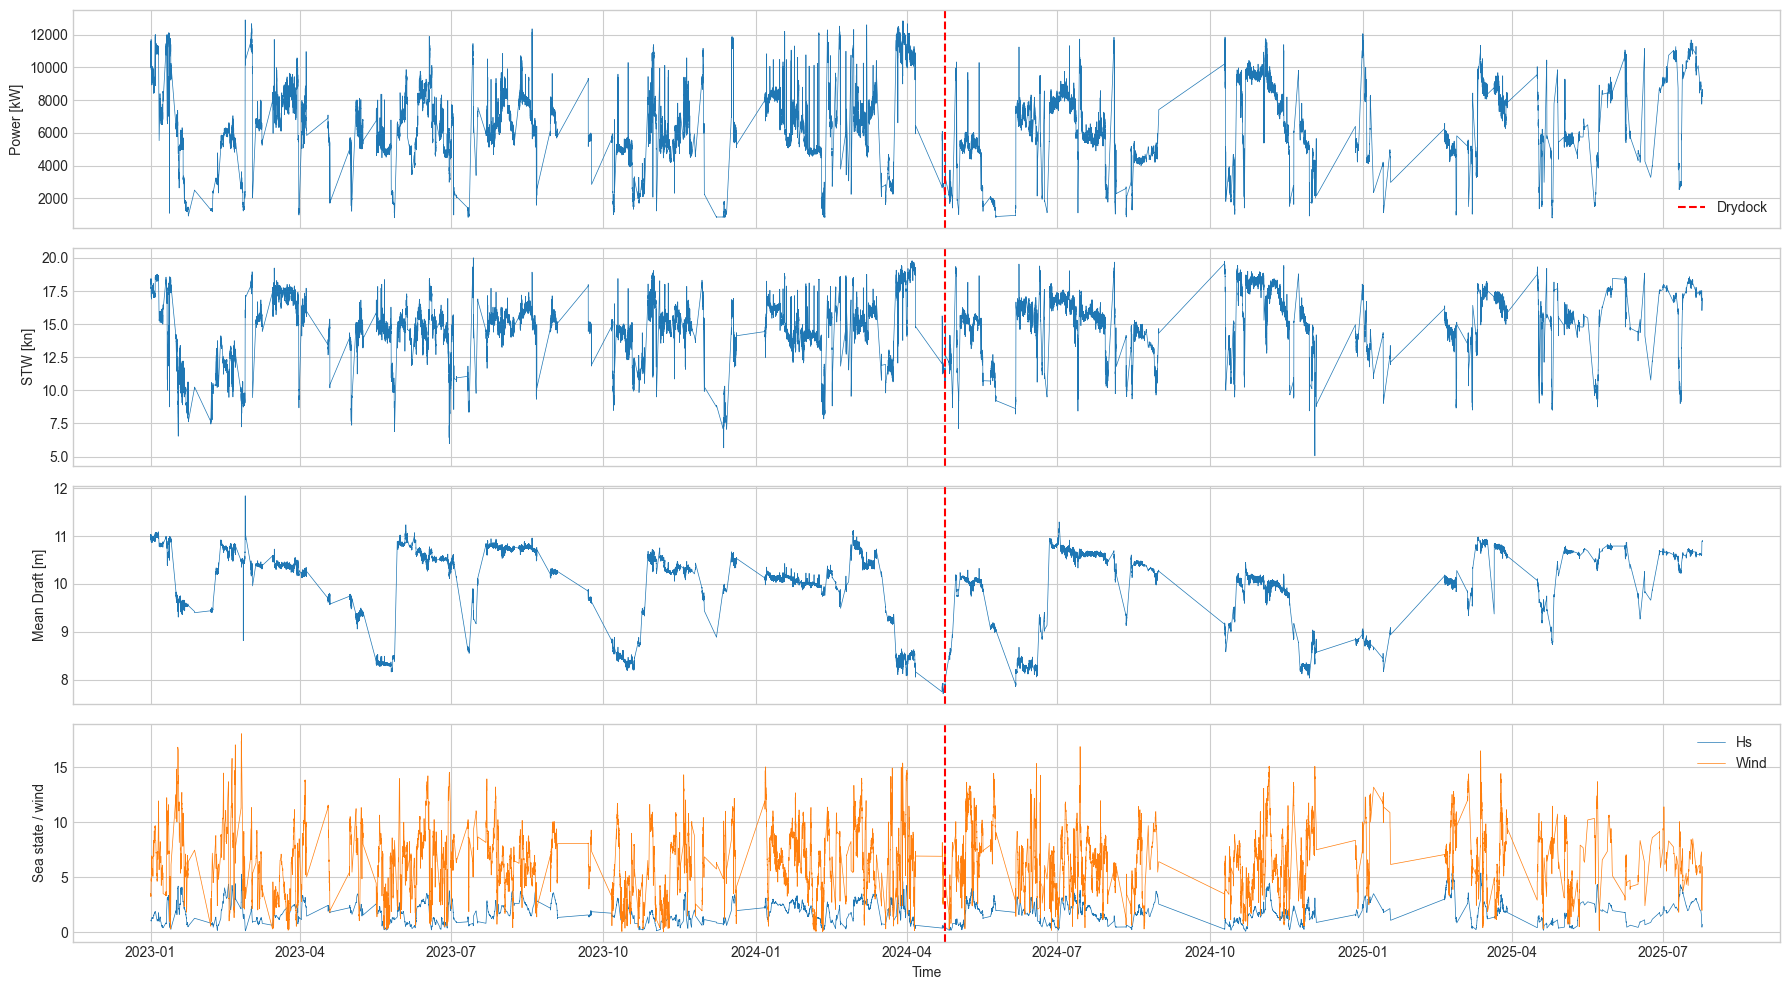

In [17]:
fig, axes = plt.subplots(4, 1, figsize=(18, 10), sharex=True)

axes[0].plot(df["timestamp"], df["ShaftPower_kW"], lw=0.5)
axes[0].axvline(drydock_date, color="red", ls="--", label="Drydock")
axes[0].set_ylabel("Power [kW]")
axes[0].legend()

axes[1].plot(df["timestamp"], df["SpeedThroughWater_kn"], lw=0.5)
axes[1].axvline(drydock_date, color="red", ls="--")
axes[1].set_ylabel("STW [kn]")

axes[2].plot(df["timestamp"], df["mean_draft"], lw=0.5)
axes[2].axvline(drydock_date, color="red", ls="--")
axes[2].set_ylabel("Mean Draft [m]")

axes[3].plot(df["timestamp"], df["swh"], lw=0.5, label="Hs")
axes[3].plot(df["timestamp"], df["wind_speed_10m_ms"], lw=0.5, label="Wind")
axes[3].axvline(drydock_date, color="red", ls="--")
axes[3].set_ylabel("Sea state / wind")
axes[3].set_xlabel("Time")
axes[3].legend()

plt.tight_layout()
plt.show()


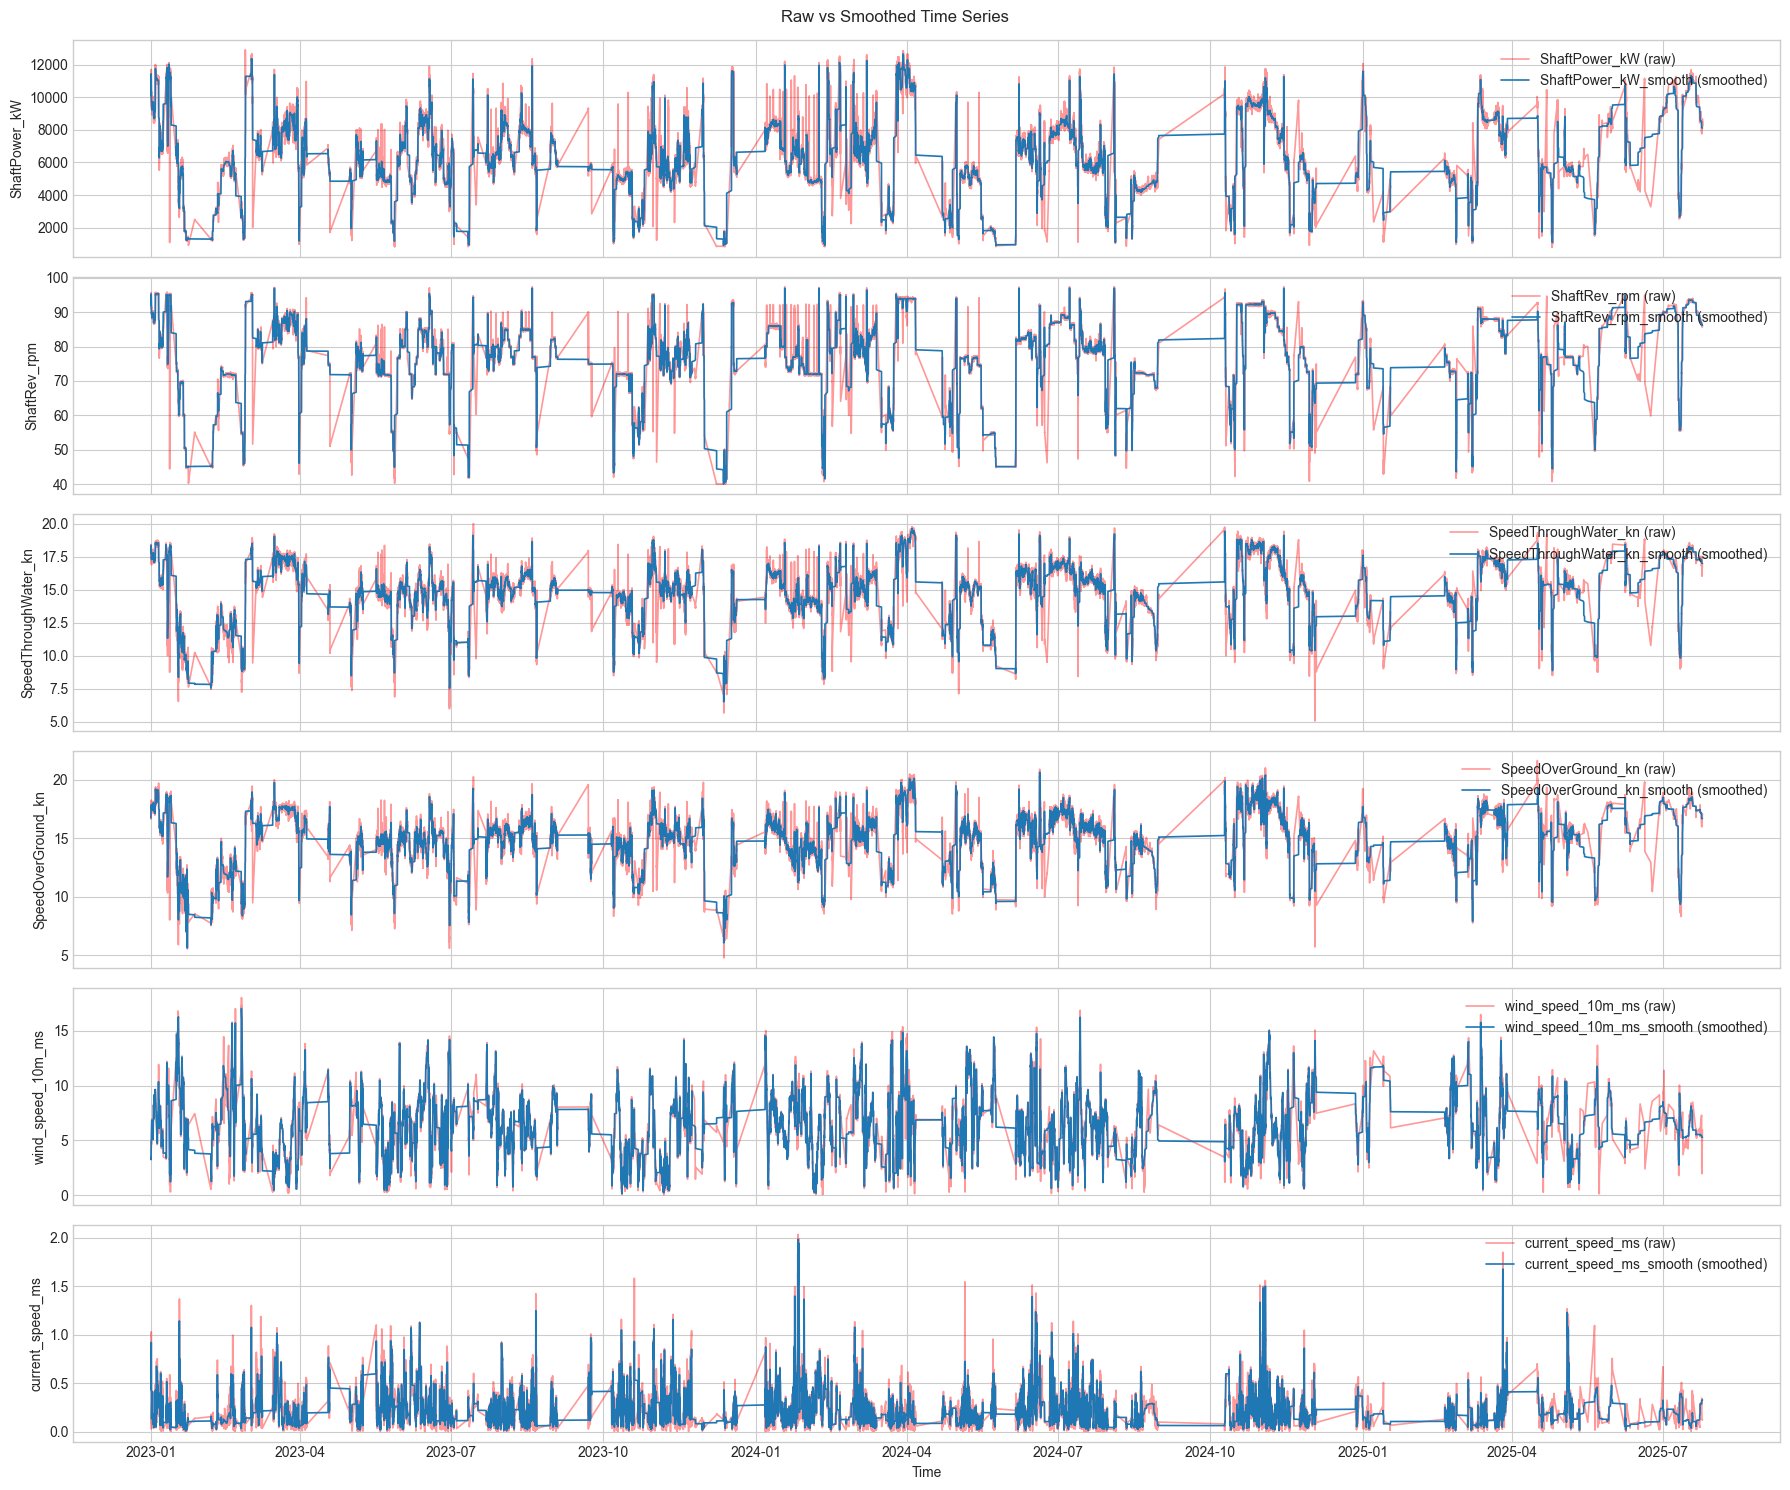

In [23]:
smooth_pairs = [
    ("ShaftPower_kW", "ShaftPower_kW_smooth"),
    ("ShaftRev_rpm", "ShaftRev_rpm_smooth"),
    ("SpeedThroughWater_kn", "SpeedThroughWater_kn_smooth"),
    ("SpeedOverGround_kn", "SpeedOverGround_kn_smooth"),
    ("wind_speed_10m_ms", "wind_speed_10m_ms_smooth"),
    ("current_speed_ms", "current_speed_ms_smooth"),
]

smooth_pairs = [
    (raw, sm)
    for raw, sm in smooth_pairs
    if raw in df.columns and sm in df.columns
]

if smooth_pairs:
    n_rows = len(smooth_pairs)
    fig, axes = plt.subplots(n_rows, 1, figsize=(18, 2.5 * n_rows), sharex=True)

    if n_rows == 1:
        axes = [axes]

    for ax, (raw_col, smooth_col) in zip(axes, smooth_pairs):
        ax.plot(df["timestamp"], df[raw_col], label=f"{raw_col} (raw)", alpha=0.4, lw=1.2, color="red")
        ax.plot(df["timestamp"], df[smooth_col], label=f"{smooth_col} (smoothed)", lw=1.2)
        ax.set_ylabel(raw_col)
        ax.legend(loc="upper right")

    axes[-1].set_xlabel("Time")
    plt.suptitle("Raw vs Smoothed Time Series", y=0.99)
    plt.tight_layout()
    plt.show()


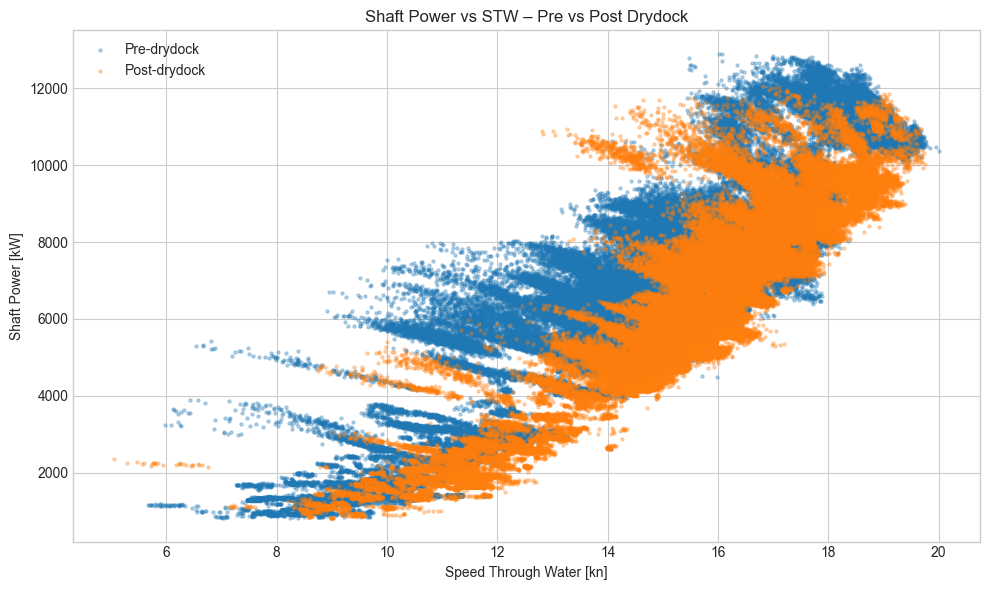

In [19]:
pre = df[df["timestamp"] < drydock_date]
post = df[df["timestamp"] >= drydock_date]

plt.figure(figsize=(10, 6))
plt.scatter(pre["SpeedThroughWater_kn"], pre["ShaftPower_kW"], s=5, alpha=0.3, label="Pre-drydock", color="tab:blue")
plt.scatter(post["SpeedThroughWater_kn"], post["ShaftPower_kW"], s=5, alpha=0.3, label="Post-drydock", color="tab:orange")

plt.xlabel("Speed Through Water [kn]")
plt.ylabel("Shaft Power [kW]")
plt.title("Shaft Power vs STW – Pre vs Post Drydock")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


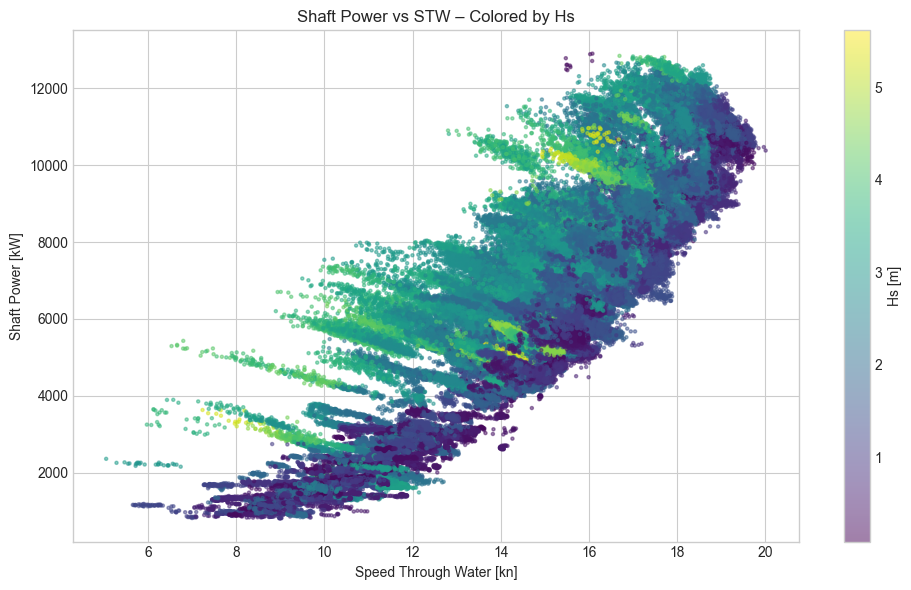

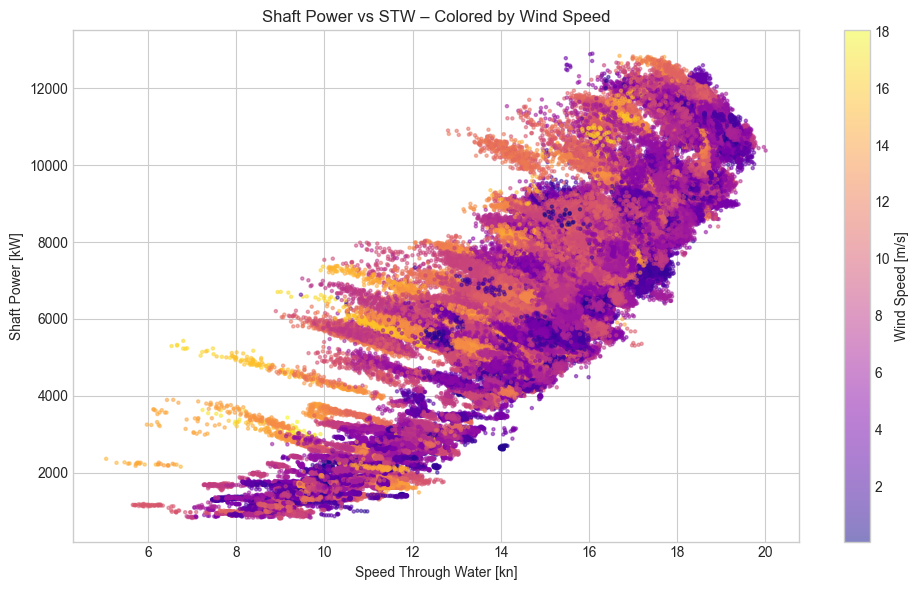

In [20]:
plt.figure(figsize=(10, 6))
sc = plt.scatter(df["SpeedThroughWater_kn"], df["ShaftPower_kW"], c=df["swh"], cmap="viridis", s=5, alpha=0.5)
plt.xlabel("Speed Through Water [kn]")
plt.ylabel("Shaft Power [kW]")
plt.title("Shaft Power vs STW – Colored by Hs")
plt.colorbar(sc).set_label("Hs [m]")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sc = plt.scatter(df["SpeedThroughWater_kn"], df["ShaftPower_kW"], c=df["wind_speed_10m_ms"], cmap="plasma", s=5, alpha=0.5)
plt.xlabel("Speed Through Water [kn]")
plt.ylabel("Shaft Power [kW]")
plt.title("Shaft Power vs STW – Colored by Wind Speed")
plt.colorbar(sc).set_label("Wind Speed [m/s]")
plt.tight_layout()
plt.show()


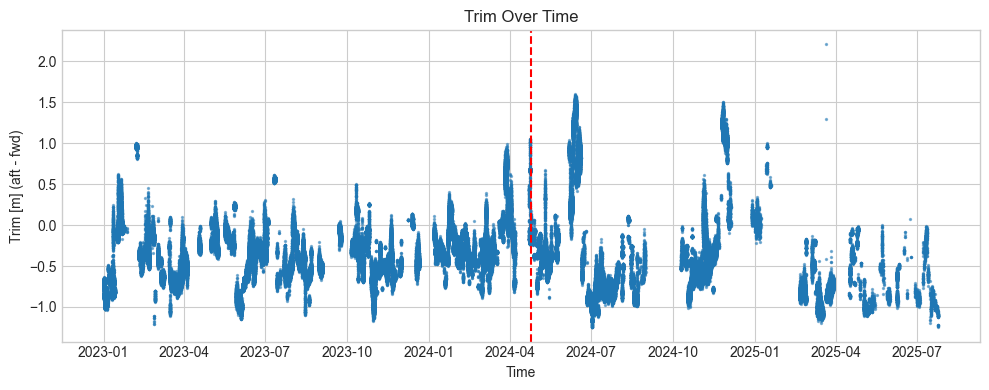

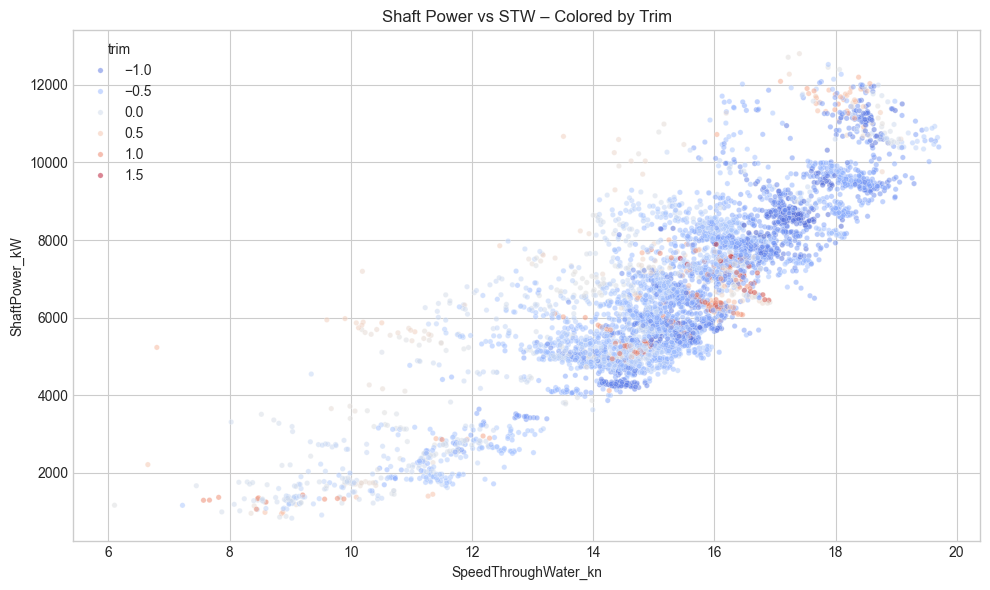

In [21]:
plt.figure(figsize=(10, 4))
plt.scatter(df["timestamp"], df["trim"], s=2, alpha=0.5)
plt.axvline(drydock_date, color="red", ls="--")
plt.ylabel("Trim [m] (aft - fwd)")
plt.xlabel("Time")
plt.title("Trim Over Time")
plt.tight_layout()
plt.show()

# Trim-coloured scatter (sampled)
df_sample = df.sample(min(len(df), 5000), random_state=42)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_sample,
    x="SpeedThroughWater_kn",
    y="ShaftPower_kW",
    hue="trim",
    palette="coolwarm",
    alpha=0.5,
    s=15
)
plt.title("Shaft Power vs STW – Colored by Trim")
plt.tight_layout()
plt.show()


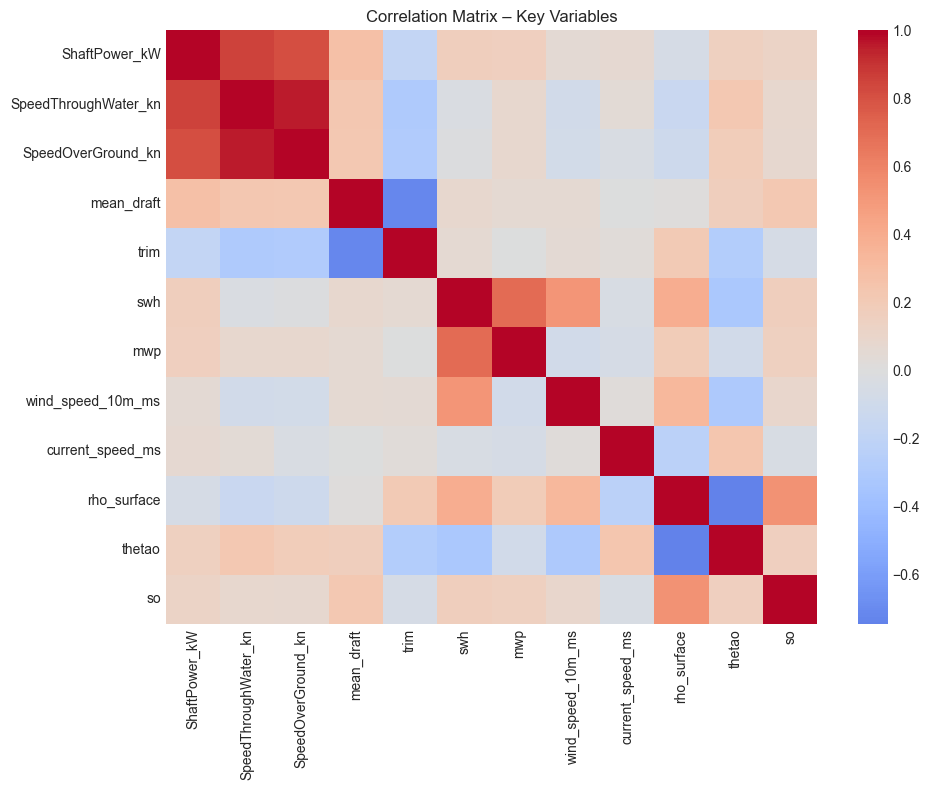

In [22]:
corr_cols = [
    "ShaftPower_kW",
    "SpeedThroughWater_kn",
    "SpeedOverGround_kn",
    "mean_draft", "trim",
    "swh", "mwp",
    "wind_speed_10m_ms",
    "current_speed_ms",
    "rho_surface", "thetao", "so",
]

corr = df[corr_cols].dropna().corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap="coolwarm", center=0, annot=False)
plt.title("Correlation Matrix – Key Variables")
plt.tight_layout()
plt.show()
